# NMF Practical Work

**Roland Badeau - Notebook code by Umut Simsekli** 

Telecom Paris - TSIA 206 - Guillaume Capitan & Baptiste Moalic - 2022

In [187]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


<Figure size 432x288 with 0 Axes>

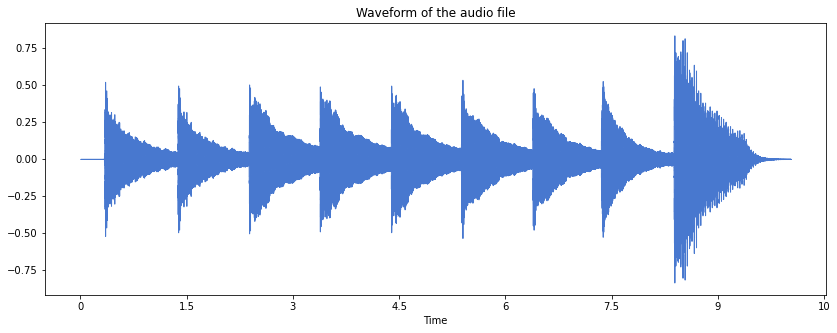

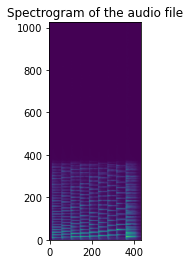

In [188]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None) #To use with Weiner
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(X**0.3)
plt.title('Spectrogram of the audio file')
plt.gca().invert_yaxis()

# Example reconstruction
y_hat = librosa.istft(Xstft)
ipd.Audio(y_hat, rate=sr)

## Deriving the MUR algorithm

</br>Suivons la même méthode que celle vue en cours : on veut minimiser cette mesure : $ \sum_{i=1}^{I} \sum_{j=1}^{J} d_{\beta}(x_{ij} || \hat{x}_{ij})$ par rapport à $W$ dans un premier temps, ce qui nous donnera une règle de mise à jour sur $W$.
</br>La dérivation sur $ d_{\beta}(x_{ij} || \hat{x}_{ij}) = \dfrac{x^{\beta}_{ij}}{\beta (\beta -1)} - \dfrac{x_{ij}\hat{x}^{\beta - 1}_{ij}}{\beta -1} + \dfrac{\hat{x}^{\beta}_{ij}}{\beta}$ donne : 
$$ \dfrac{\partial d_{\beta}}{\partial w_{ik}} = \sum_{j} \dfrac{\partial d_{\beta}}{\partial \hat{x}{ij}} \dfrac{\partial \hat{x}{ij}}{\partial w_{ik}} = \sum_j (0 - x_{ij}\hat{x}^{\beta - 2}_{ij} + \hat{x}^{\beta-1}_{ij}) h_{kj} =\sum_j (\hat{x}^{\beta -1}_{ij} - x_{ij}\hat{x}^{\beta - 2}_{ij}) h_{kj}$$
avec, pour le deuxième terme de la règle du chaînage : $\hat{x}_{ij} = \Sigma_k w_{ik}h_{kj}$ </br> 
Descente de gradient de pas $\eta > 0$ : 
</br>
$w_{ik} \leftarrow w_{ik} -\eta \sum_j (\hat{x}^{\beta -1}_{ij} - x_{ij}\hat{x}^{\beta - 2}_{ij}) h_{kj}$ 
</br> </br> Or, on a une contrainte de positivité, donc on projette le gradient (en gros le $\eta$ va avoir des indices). </br>
On pose $\eta_{ik} = \dfrac{w_{ik}}{\sum_{j} \hat{x}_{ij}^{\beta - 1} h_{kj}}$et alors la mise à jour additive $w_{ik} \leftarrow w_{ik} - \eta_{ik} \sum_j ( \hat{x}^{\beta -1}_{ij} - x_{ij}\hat{x}^{\beta - 2}_{ij}) h_{kj} $ devient alors </br> </br>
$w_{ik} \leftarrow w_{ik} - w_{ik} \dfrac{\sum_j \hat{x}^{\beta -1}_{ij}h_{kj}}{\sum_j \hat{x}^{\beta -1}_{ij}h_{kj}} + w_{ik}\dfrac{\sum_j (x_{ij}\hat{x}^{\beta - 2}_{ij}) h_{kj}}{\sum_j \hat{x}^{\beta -1}_{ij}h_{kj}} = 0 + w_{ik}\dfrac{\sum_j (x_{ij}\hat{x}^{\beta - 2}_{ij}) h_{kj}}{\sum_j \hat{x}^{\beta -1}_{ij}h_{kj}}$, </br> </br>
soit une mise à jour multiplicative s'écrivant terme à terme comme </br> </br>
$w_{ik} \leftarrow w_{ik}\dfrac{\sum_j \dfrac{x_{ij}}{\hat{x}_{ij}} h_{kj}}{\sum_j h_{kj}} $ </br> </br>
ou encore matriciellement, comme $\hat{V} = WH$, de la manière suivante :</br> </br>
$$ W \leftarrow W \circ \dfrac{\dfrac{V}{WH}H^T}{\mathbb{1}H^T}$$
</br> 
Pour exactement faire comme dans l'énoncé du TP, il suffit de reprendre l'expression précédente terme à terme (avec le $\beta - 2$ en haut et le $\beta - 1$) sans simplifier la fraction et la mettre en forme matricielle, comme suit :
$$ w_{ik} \leftarrow w_{ik}\dfrac{\sum_j  (x_{ij}\hat{x}^{\beta - 2}_{ij}) h_{kj}}{\sum_j \hat{x}^{\beta -1}_{ij} h_{kj}} $$ devient ainsi $$ W \leftarrow W \circ \dfrac{(X \circ \hat{X}^{\beta-2})H^T}{\hat{X}^{\beta -1}H^T} $$ 
</br> </br> </br> </br>

De même, pour H, on veut minimiser la même mesure mais cette fois par rapport à $H$. On ne dérive plus par rapport à $w_{ik}$ mais mais par rapport à $h_{kj}$ cette fois. 

</br>La dérivation sur $ d_{\beta}(x_{ij} || \hat{x}_{ij}) = \dfrac{x^{\beta}_{ij}}{\beta (\beta -1)} - \dfrac{x_{ij}\hat{x}^{\beta - 1}_{ij}}{\beta -1} + \dfrac{\hat{x}^{\beta}_{ij}}{\beta}$ donne : 
$$ \dfrac{\partial d_{\beta}}{\partial h_{kj}} = \sum_{i} \dfrac{\partial d_{\beta}}{\partial \hat{x}{ij}} \dfrac{\partial \hat{x}{ij}}{\partial h_{kj}} = \sum_i (0 - x_{ij}\hat{x}^{\beta - 2}_{ij} + \hat{x}^{\beta-1}_{ij}) w_{ik} =\sum_i (\hat{x}^{\beta -1}_{ij} - x_{ij}\hat{x}^{\beta - 2}_{ij}) w_{ik}$$
avec, pour le deuxième terme de la chain rule, $\hat{x}_{ij} = \Sigma_k w_{ik}h_{kj}$ </br> </br>
Descente de gradient de pas $\eta > 0$ : 
</br>
$h_{kj} \leftarrow h_{kj} -\eta \sum_i (\hat{x}^{\beta -1}_{ij} - x_{ij}\hat{x}^{\beta - 2}_{ij}) w_{ik}$ 
</br> </br> Or, on a une contrainte de positivité, donc on projette le gradient (en gros le $\eta$ va avoir des indices). </br>
Cette fois, on pose $\eta_{kj} = \dfrac{h_{kj}}{\sum_{i} \hat{x}_{ij}^{\beta - 1} w_{ik}}$et alors la mise à jour additive $h_{kj} \leftarrow h_{kj} - \eta_{kj} \sum_i ( \hat{x}^{\beta -1}_{ij} - x_{ij}\hat{x}^{\beta - 2}_{ij}) w_{ik} $ devient alors </br> </br>
$h_{kj} \leftarrow h_{kj} - h_{kj} \dfrac{\sum_i \hat{x}^{\beta -1}_{ij}w_{ik}}{\sum_i \hat{x}^{\beta -1}_{ij}w_{ik}} + h_{kj}\dfrac{\sum_i (x_{ij}\hat{x}^{\beta - 2}_{ij}) w_{ik}}{\sum_i \hat{x}^{\beta -1}_{ij}w_{ik}} = 0 + h_{kj}\dfrac{\sum_i (x_{ij}\hat{x}^{\beta - 2}_{ij}) w_{ik}}{\sum_i \hat{x}^{\beta -1}_{ij}w_{ik}}$, </br> </br>
soit une mise à jour multiplicative s'écrivant terme à terme comme </br> </br>
$h_{kj} \leftarrow h_{kj}\dfrac{\sum_i w_{ik} \dfrac{x_{ij}}{\hat{x}_{ij}} }{\sum_i w_{ik}} $ </br> </br>
ou encore matriciellement, comme $\hat{V} = WH$, de la manière suivante :</br> </br>
$$ H \leftarrow H \circ \dfrac{W^T\dfrac{V}{WH}}{W^T\mathbb{1}}$$
</br> 
Pour exactement faire comme dans l'énoncé du TP, il suffit de reprendre l'expression précédente terme à terme (avec le $\beta - 2$ en haut et le $\beta - 1$) sans simplifier la fraction et la mettre en forme matricielle, comme suit :
$$ h_{kj} \leftarrow h_{kj}\dfrac{\sum_i w_{ik} (x_{ij}\hat{x}^{\beta - 2}_{ij})}{\sum_i w_{ik} \hat{x}^{\beta -1}_{ij}} $$ devient ainsi $$ H \leftarrow H \circ \dfrac{W^T (X \circ \hat{X}^{\beta-2})}{W^T\hat{X}^{\beta -1}} $$ 

## Implementing the MUR update rule

In [189]:
# Implement MUR for NMF with beta-divergence 

# Preliminary functions

##MUR update of W
def W_update(X, W, H, beta):
    eps = 1e-8
    X_hat = W @ H
    parenthesis = X*(X_hat**(beta-2))
    numerator = (parenthesis @ H.T) + eps
    denominator = ((X_hat**(beta-1)) @ H.T) + eps
    factor = numerator/denominator
    res = W*factor
    return res
    
##MUR update of H
def H_update(X, W, H, beta):
    eps = 1e-8 #for stability reasons
    X_hat = W @ H
    parenthesis = X*(X_hat**(beta-2))
    numerator = (W.T @ parenthesis) + eps
    denominator = (W.T @ (X_hat**(beta-1))) + eps
    factor = numerator/denominator
    res = H*factor
    return res

##Beta-divergence for matrices
def b_div_loss(X, W, H, beta):
    X_hat = W @ H
    res = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            res += b_div(X[i, j], X_hat[i, j], beta)
    return res
            
##Beta-divergence for scalars
def b_div(x, x_hat, beta):
    res = ((x**beta)/(beta*(beta-1)))-((x*(x_hat**(beta-1)))/(beta-1))+((x_hat**beta)/beta)
    return res

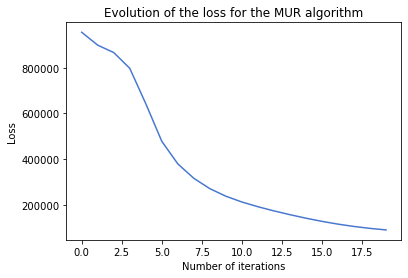

In [168]:
##Initialization of the parameters, and of W and H
eps = 1e-8
X += eps #for stability reasons
K = 8 #Order of the dimension reduction
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
nb_of_iterations = 20
beta = 2
error_array = np.zeros(nb_of_iterations)

for k in range(nb_of_iterations):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    error_array[k] = b_div_loss(X, W, H, beta)
plt.plot(error_array)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Evolution of the loss for the MUR algorithm')
plt.show()

We observe a decreasing graph, it is exactly what we are looking for, it means our algorithm converges. The value of the loss does not mean much, as it really depends on which beta-divergence we choose, and on the conditioning of the original matrix.

In [169]:
# Use Wiener filtering to reconstruct each note separately
#Source 0
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
weiner_filter_0 = filter_num/filter_denom

X_0 = np.multiply(Xstft, weiner_filter_0)

<Figure size 432x288 with 0 Axes>

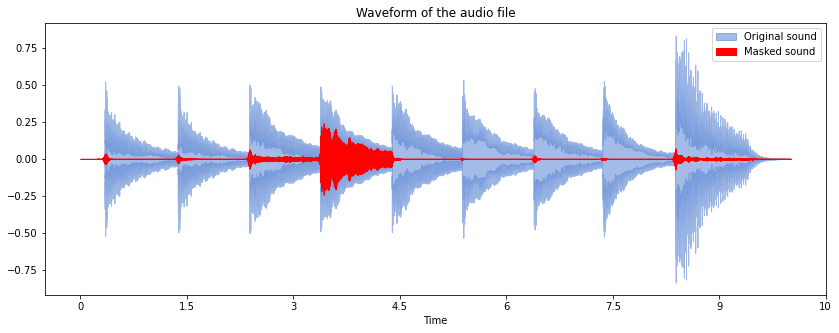

In [170]:
#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y_hat, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat_0, sr=sr, color='r', label='Masked sound')
plt.legend()

# Example reconstruction
y_hat_0 = librosa.istft(X_0)
ipd.Audio(y_hat_0, rate=sr)

Our algorithm works : we have isolated one spectral component as we can observe on the above graph. We still have some residuals, which might be explained by the harmonics still present on the predicted spectrum.
We can also note that the algorithm struggles at the end, when all the notes are played simultaneously.
We might want to set a treshold so that the residual notes are removed from the final signal.

Let's pick another column of H/row of W to verify if we obtain similar results for other frequency components:

<Figure size 432x288 with 0 Axes>

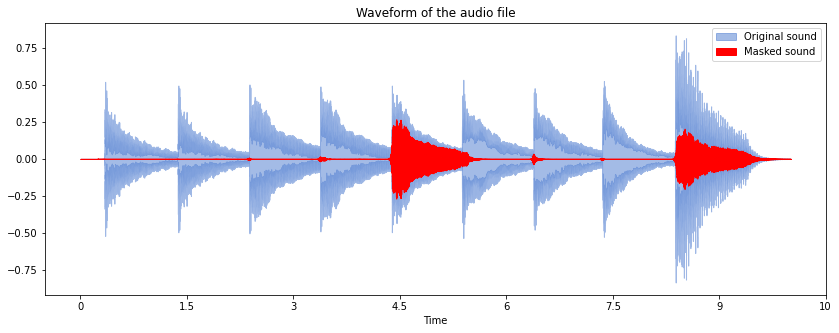

In [171]:
#Source 0
filter_num = np.outer(W[:, 2].reshape(-1), H[2, :].reshape(-1))
filter_denom = W @ H
weiner_filter_1 = filter_num/filter_denom

X_1 = np.multiply(Xstft, weiner_filter_1)
y_hat_1 = librosa.istft(X_1)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y_hat, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat_1, sr=sr, color='r', label='Masked sound')
plt.legend()

# Example reconstruction
ipd.Audio(y_hat_1, rate=sr)

We can also note the fact that the NMF has an indeterminacy in permutation: the first column does not refer to the first spectral component at all. That is why we will see in all the figures different components each time, and not the first and second component every time.

## Experimenting with the algorithm parameters

#### Beta
Let's starty by varying the beta parameter : 1.01 and 3 (we cannot chose 1 because of the  division by 0 in the beta-divergence formula). To recall, we had beta=2 in the previous simulation.

#### Beta = 1.01

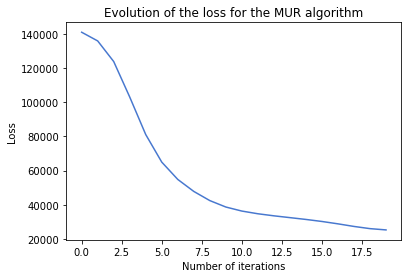

In [172]:
##Initialization of the parameters, and of W and H
eps = 1e-8
X += eps #for stability reasons
K = 8 #Order of the dimension reduction
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
nb_of_iterations = 20
beta = 1.01
error_array = np.zeros(nb_of_iterations)

for k in range(nb_of_iterations):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    error_array[k] = b_div_loss(X, W, H, beta)
plt.plot(error_array)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Evolution of the loss for the MUR algorithm')
plt.show()

<Figure size 432x288 with 0 Axes>

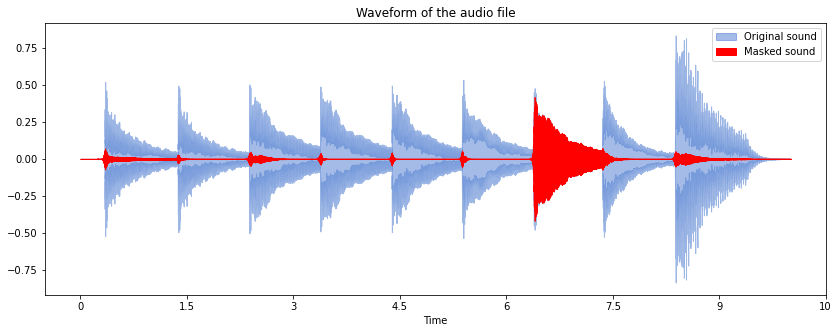

In [173]:
# Use Wiener filtering to reconstruct each note separately
#Source 0
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
weiner_filter_0 = filter_num/filter_denom

X_0 = np.multiply(Xstft, weiner_filter_0)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y_hat, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat_0, sr=sr, color='r', label='Masked sound')
plt.legend()

# Example reconstruction
y_hat_0 = librosa.istft(X_0)
ipd.Audio(y_hat_0, rate=sr)

#### Beta = 3

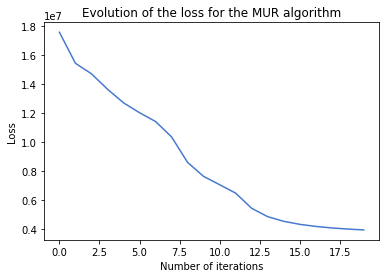

In [174]:
##Initialization of the parameters, and of W and H
eps = 1e-8
X += eps #for stability reasons
K = 8 #Order of the dimension reduction
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
nb_of_iterations = 20
beta = 3
error_array = np.zeros(nb_of_iterations)

for k in range(nb_of_iterations):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    error_array[k] = b_div_loss(X, W, H, beta)
plt.plot(error_array)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Evolution of the loss for the MUR algorithm')
plt.show()

<Figure size 432x288 with 0 Axes>

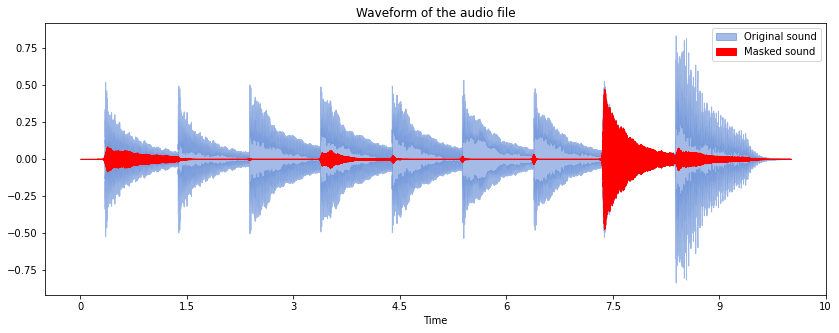

In [175]:
# Use Wiener filtering to reconstruct each note separately
#Source 0
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
weiner_filter_0 = filter_num/filter_denom

X_0 = np.multiply(Xstft, weiner_filter_0)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y_hat, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat_0, sr=sr, color='r', label='Masked sound')
plt.legend()

# Example reconstruction
y_hat_0 = librosa.istft(X_0)
ipd.Audio(y_hat_0, rate=sr)

From what we can see:
<ul>
    <li>a higher beta coefficient means a higher loss value. We have already said that this value does not really matter in terms of interpretation, but still it can have an impact on performance (storing and processing high values)
    <li>the lower beta is, the faster the convergence is
        
The beta coefficient therefore has a direct impact on the performance of our MUR algorithm.

#### Number of columns in W
#### 5 columns

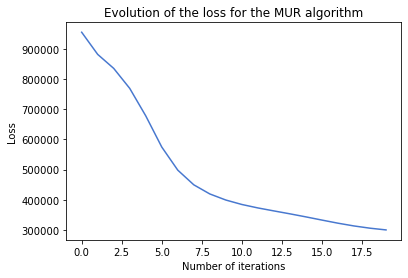

<Figure size 432x288 with 0 Axes>

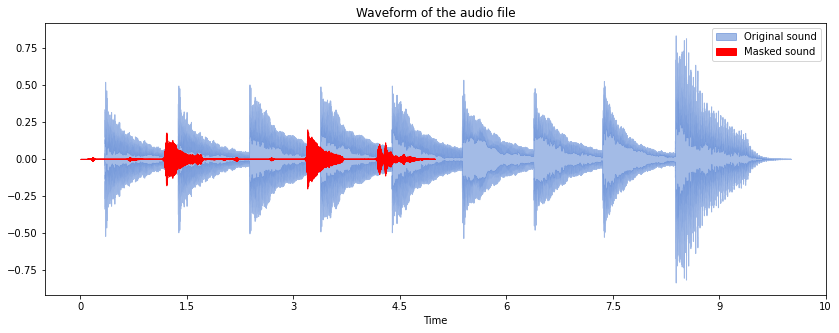

In [190]:
##Initialization of the parameters, and of W and H
eps = 1e-8
X += eps #for stability reasons
K = 5 #Order of the dimension reduction
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
nb_of_iterations = 20
beta = 2
error_array = np.zeros(nb_of_iterations)

for k in range(nb_of_iterations):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    error_array[k] = b_div_loss(X, W, H, beta)
plt.plot(error_array)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Evolution of the loss for the MUR algorithm')
plt.show()

# Use Wiener filtering to reconstruct each note separately
#Source 0
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
weiner_filter_0 = filter_num/filter_denom

X_0 = np.multiply(Xstft, weiner_filter_0)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y_hat, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat_0, sr=sr, color='r', label='Masked sound')
plt.legend()

# Example reconstruction
y_hat_0 = librosa.istft(X_0)
ipd.Audio(y_hat_0, rate=sr)

#### 12 columns

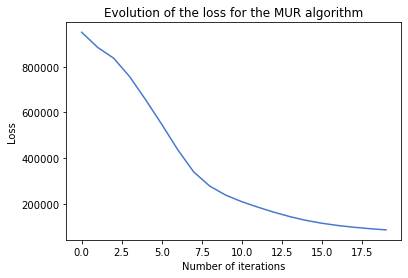

<Figure size 432x288 with 0 Axes>

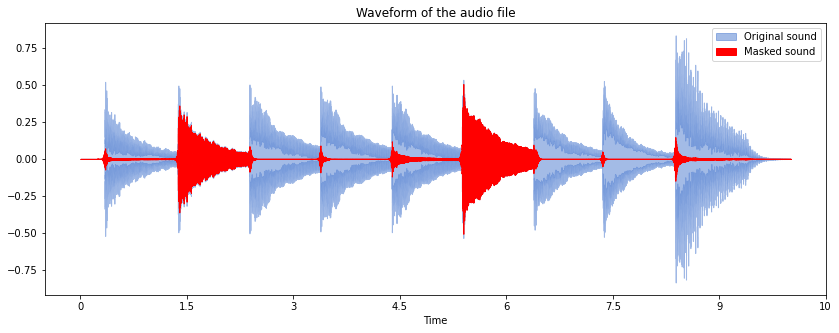

In [191]:
##Initialization of the parameters, and of W and H
eps = 1e-8
X += eps #for stability reasons
K = 12 #Order of the dimension reduction
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
nb_of_iterations = 20
beta = 2
error_array = np.zeros(nb_of_iterations)

for k in range(nb_of_iterations):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    error_array[k] = b_div_loss(X, W, H, beta)
plt.plot(error_array)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Evolution of the loss for the MUR algorithm')
plt.show()

# Use Wiener filtering to reconstruct each note separately
#Source 0
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
weiner_filter_0 = filter_num/filter_denom

X_0 = np.multiply(Xstft, weiner_filter_0)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y_hat, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat_0, sr=sr, color='r', label='Masked sound')
plt.legend()

# Example reconstruction
y_hat_0 = librosa.istft(X_0)
ipd.Audio(y_hat_0, rate=sr)

In either case, the algorithm struggles:
<ul>
    <li>In the underdetermined case, it looks like the algorithm tries to pick up some information, and recognizes it (we have kind of one component, and the algorithm recognizes it at the end too), but overall it is not sufficient, there is too much information for too little dimensions.
    <li>In the overdetermined case, it is the contrary, the algorithm has so much room for information, it will try to pick up something else than the fundamental frequency, and in the end, we do not have the separation we want.
        
As the performance is quite similar, the choice of dimension reduction will impact the result of our separation.

#### STFT hop size
It is related to the overlap between the STFTs of the original signal

#### Hop size = 1024 (x2)

In [192]:
# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=1024, win_length=None) #Lui pour Weiner
X = np.abs(Xstft)

In [193]:
# Original sound
y_hat = librosa.istft(Xstft)
ipd.Audio(y_hat, rate=sr)

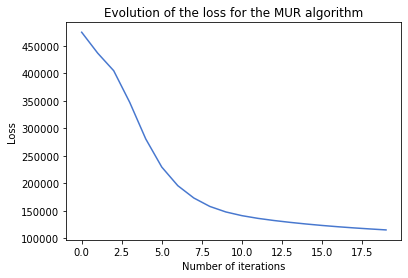

<Figure size 432x288 with 0 Axes>

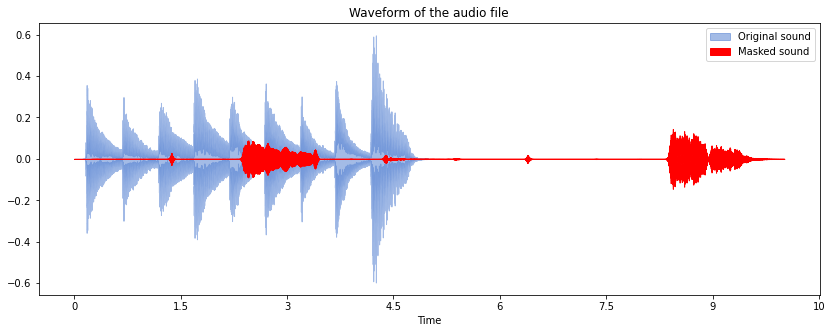

In [194]:
##Initialization of the parameters, and of W and H
eps = 1e-8
X += eps #for stability reasons
K = 8 #Order of the dimension reduction
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
nb_of_iterations = 20
beta = 2
error_array = np.zeros(nb_of_iterations)

for k in range(nb_of_iterations):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    error_array[k] = b_div_loss(X, W, H, beta)
plt.plot(error_array)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Evolution of the loss for the MUR algorithm')
plt.show()

# Use Wiener filtering to reconstruct each note separately
#Source 0
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
weiner_filter_0 = filter_num/filter_denom

X_0 = np.multiply(Xstft, weiner_filter_0)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y_hat, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat_0, sr=sr, color='r', label='Masked sound')
plt.legend()

# Example reconstruction
y_hat_0 = librosa.istft(X_0)
ipd.Audio(y_hat_0, rate=sr)

#### Hop size =  256 (/2)

In [195]:
# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=256, win_length=None) #Lui pour Weiner
X = np.abs(Xstft)

In [196]:
# Original sound
y_hat = librosa.istft(Xstft)
ipd.Audio(y_hat, rate=sr)

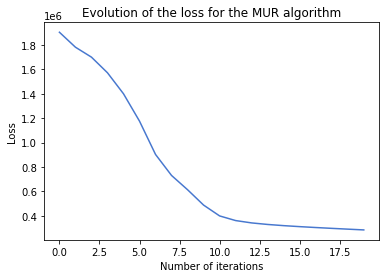

<Figure size 432x288 with 0 Axes>

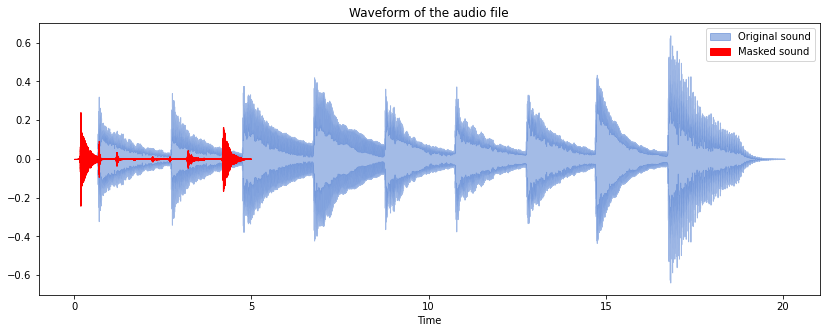

In [197]:
##Initialization of the parameters, and of W and H
eps = 1e-8
X += eps #for stability reasons
K = 8 #Order of the dimension reduction
W = np.random.rand(X.shape[0], K)
H = np.random.rand(K, X.shape[1])
nb_of_iterations = 20
beta = 2
error_array = np.zeros(nb_of_iterations)

for k in range(nb_of_iterations):
    W = W_update(X, W, H, beta)
    H = H_update(X, W, H, beta)
    error_array[k] = b_div_loss(X, W, H, beta)
plt.plot(error_array)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Evolution of the loss for the MUR algorithm')
plt.show()

# Use Wiener filtering to reconstruct each note separately
#Source 0
filter_num = np.outer(W[:, 0].reshape(-1), H[0, :].reshape(-1))
filter_denom = W @ H
weiner_filter_0 = filter_num/filter_denom

X_0 = np.multiply(Xstft, weiner_filter_0)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
plt.title('Waveform of the audio file')
librosa.display.waveshow(y_hat, sr=sr, alpha=0.5, label='Original sound')
librosa.display.waveshow(y_hat_0, sr=sr, color='r', label='Masked sound')
plt.legend()

# Example reconstruction
y_hat_0 = librosa.istft(X_0)
ipd.Audio(y_hat_0, rate=sr)

By modifying the hop size of the STFTs, we end up with a speeded up/slowed down signal, therefore it will have effects on the separation too. Here, even though the scale is not appropriate, the algorithm seems to find a frequency component and to recognize it at the end too, but overall the performance is less satisfactory than when we keep "optimal" parameters for the STFT. The impact on performance is not really important.

**Conclusion:** The MUR algorithm for NMF proves quite efficient for audio separation, but we have to satisfy some requirements:
<ul>
    <li>We have to set up nicely our signal, with the right STFT parameters, sample rate.
    <li>The choice of the divergence is quite important, it will have an impact on performance. Here, the traditional Euclidean distance proves efficient.
    <li>We have to know **in advance** the number of sources we want to separate, because otherwise the algorithm will try to determine itself the components, and will struggle to identify them.
        
But even with all these requirements, the algorithm is not really efficient when it comes to a mixture of signals. 
We have seen better performance on this part when playing with the STFT parameters, so in the end, there is a real trade-off to be found between our data and our algorithm parameters.

$$ \% $$